In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [37]:
# node from 1 to 200
G = nx.erdos_renyi_graph(201, 0.15,seed=101)
G.number_of_edges()
G.remove_node(0)
G.number_of_nodes()

200

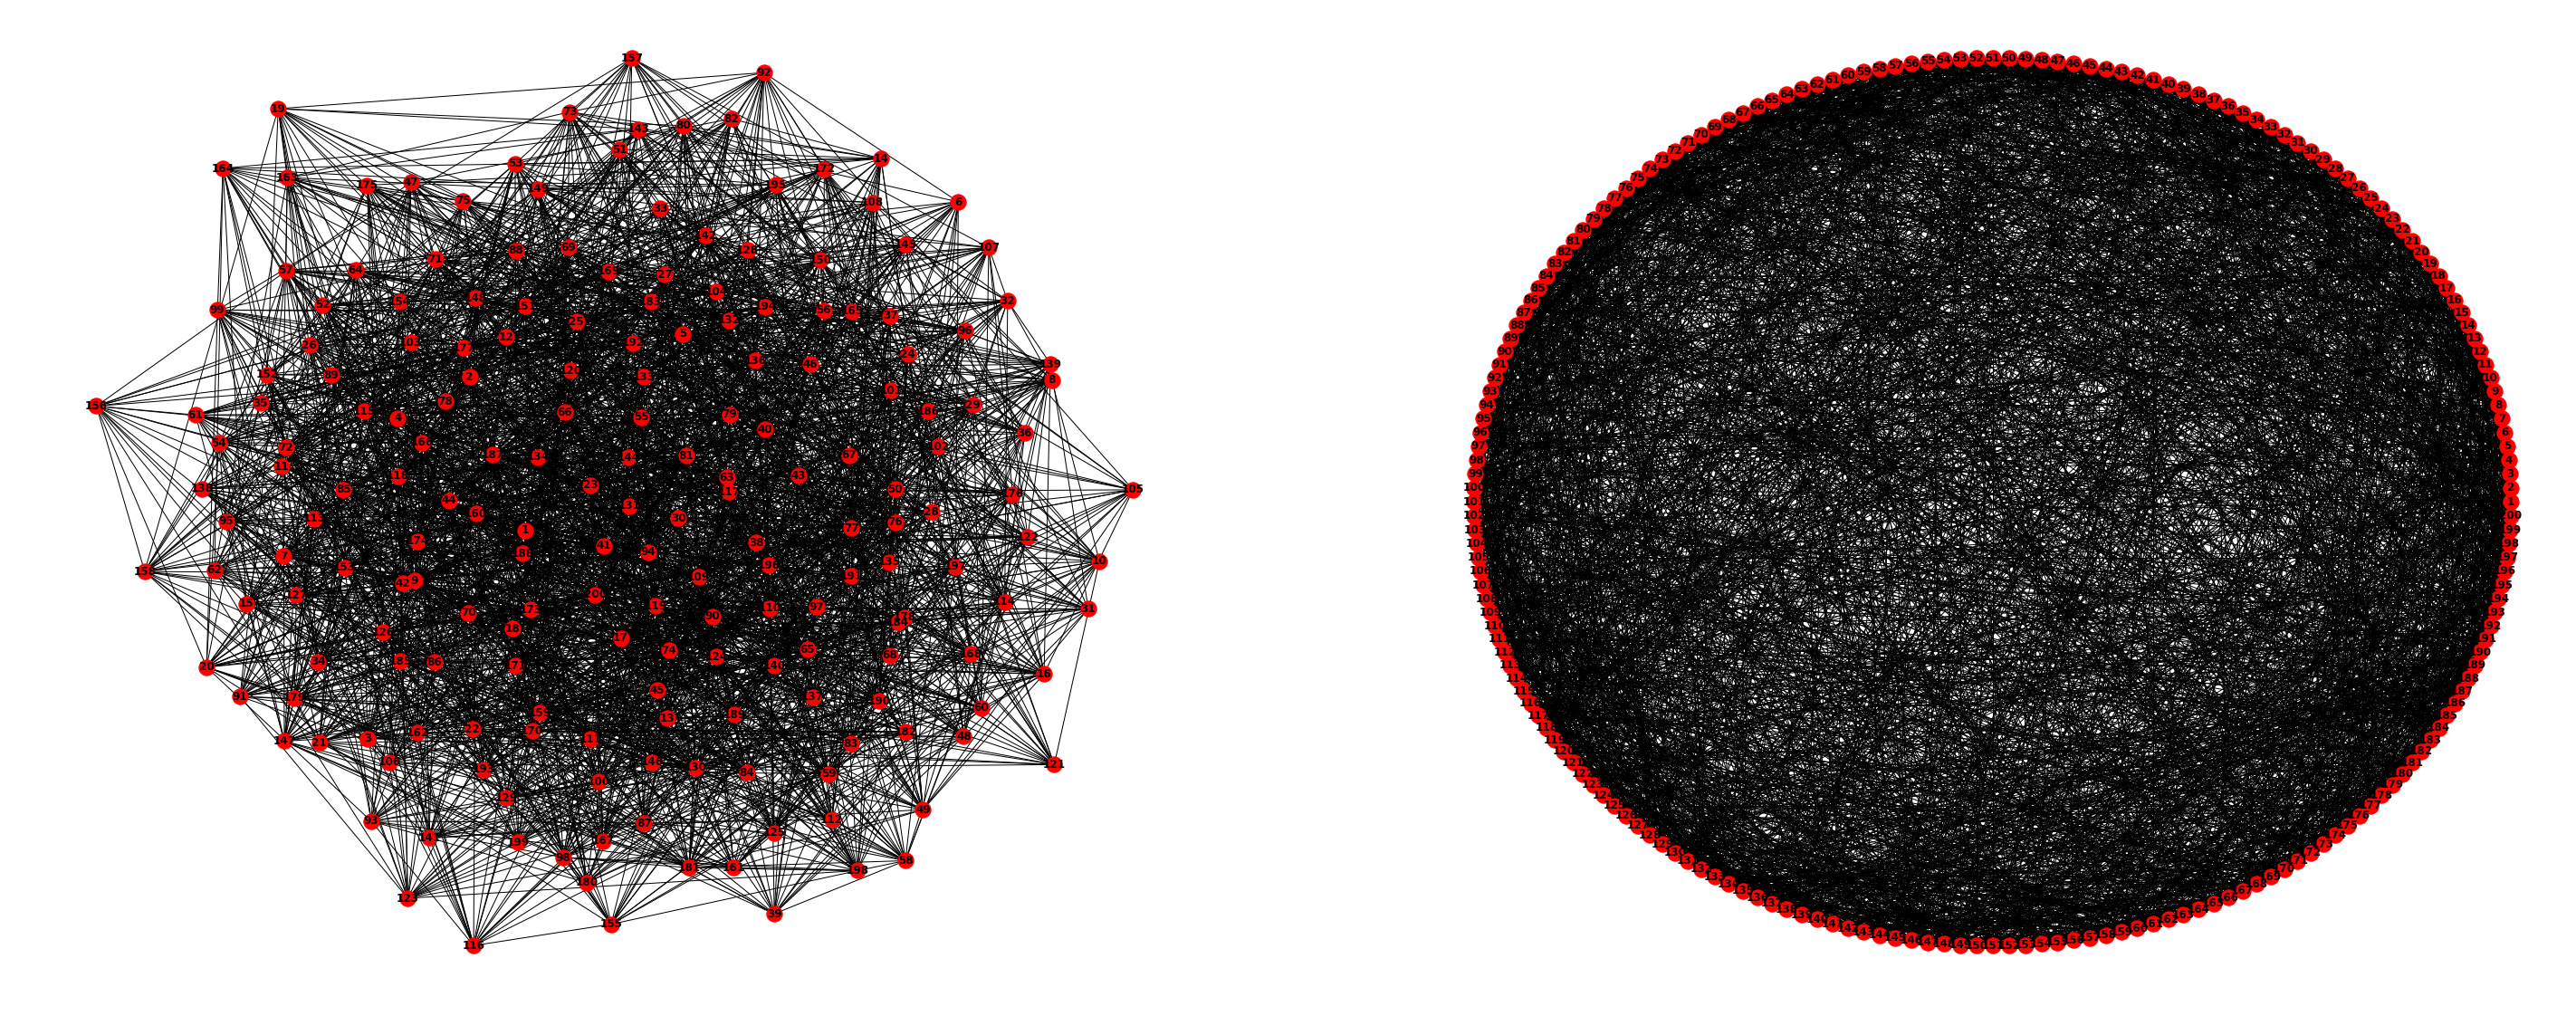

In [38]:
fig, ax = plt.subplots(figsize= (50,20))
plt.subplot(122)
nx.draw_shell(G,with_labels=True, font_weight='bold')
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
#fig.savefig('./Graph')

# Generate random data

I use these two function to perform the random work and generate data.

In [39]:
#Positive pair
# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     '''
#     number_pairs: numbers of rows will be generated
#     seqlen: The length of sequence
    
#     It will randomly chose a starting node and perfrom random walk to
#     retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
#     right side and be stored in paired_dict.
#     '''
#     paired_data=[]
#     left = [] 
#     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201) 
#         nodes= [node]
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             nodes.append(node)
#         splitor = np.random.randint(1,seqlen)
#         left = nodes[:splitor+1]
#         right = nodes[splitor:]
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data 

def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
    paired_data=[]
#     left = [] 
#     right = []
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        node = np.random.randint(1,201)
        left = [node]
        for j in range(seqlen-1):
            node =np.random.choice(list(G.adj[node]))
            left.append(node)
        right = [node]
        for j in range(seqlen-1):
            node = np.random.choice(list(G.adj[node]))
            right.append(node)
        paired_dict = {'left':left,'right':right,'target':1}
        paired_data.append(paired_dict)
    return paired_data

#Negative pair
# def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
#     '''
#     number_pairs: numbers of rows will be generated
#     seqlen: The length of sequence
#     prob: The probability of adding a noise
#     num_noise: The minimum amount of noisy points in a sequence.
    
#     It will randomly chose a starting node and perfrom random walk to
#     retrieve 50 nodes(may contain noise). Then, the 50 nodes will be 
#     seperated to left and right side and be stored in paired_dict.
#     '''
#     unpaired_data=[]
#     if random_seed != None:
#         np.random.seed(random_seed)
#     while len(unpaired_data) < num_pairs:
#         node = np.random.randint(1,201) 
#         nodes= [node]
#         k=0
#         for j in range(seqlen):
#             if np.random.rand() < prob:
#                 k+=1
#                 NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[node])]
#                 node =np.random.choice(NotConnectedNode)
#             else:    
#                 node =np.random.choice(list(G.adj[node]))
#             nodes.append(node)
#         if k < num_noise:
#             continue 
#         splitor = np.random.randint(1,seqlen)
#         left = nodes[:splitor+1]
#         right = nodes[splitor:]
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data 

def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
    unpaired_data=[]
#     left = [] 
#     right = []
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        node = np.random.randint(1,201)
        left = [node]
        for j in range(seqlen-1):
            node =np.random.choice(list(G.adj[node]))
            left.append(node)
        st_node = node    
        k=0
        while k <= num_noise:
            k=0
            try_right=[st_node]
            for j in range(seqlen-1):
                if np.random.rand() < prob:
                    k+=1
                    NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[try_right[-1]])]
                    node =np.random.choice(NotConnectedNode)
                else:    
                    node =np.random.choice(list(G.adj[try_right[-1]]))
                try_right.append(node)
        right= try_right
        unpaired_dict = {'left':left,'right':right,'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data

In [44]:
a = pd.DataFrame(CreatingPositivePairs(10000,random_seed=101))
b = pd.DataFrame(CreatingNegativePairs(10000,random_seed=101))
data = pd.concat([a,b])
with open("Fulldata.txt", "wb") as fp:   #Pickling
    pickle.dump(data, fp) 
data

,left,right,target
0,"[96, 58, 150, 52, 177, 86, 61, 103, 57, 9, 169...","[134, 74, 160, 121, 10, 183, 41, 110, 193, 70,...",1
1,"[164, 118, 172, 36, 145, 169, 67, 98, 48, 112,...","[73, 12, 181, 58, 171, 19, 126, 19, 158, 25, 2...",1
2,"[193, 81, 98, 81, 200, 91, 72, 79, 62, 85, 109...","[133, 104, 181, 63, 59, 10, 55, 113, 121, 43, ...",1
3,"[153, 47, 64, 200, 60, 180, 187, 164, 18, 84, ...","[70, 97, 4, 150, 51, 90, 131, 125, 187, 100, 1...",1
4,"[76, 30, 150, 142, 89, 115, 177, 72, 55, 177, ...","[109, 127, 179, 50, 140, 123, 4, 186, 60, 33, ...",1
5,"[142, 51, 72, 23, 131, 107, 63, 97, 3, 153, 42...","[125, 83, 125, 71, 62, 63, 153, 79, 117, 35, 1...",1
6,"[110, 95, 134, 95, 151, 104, 100, 16, 119, 13,...","[115, 32, 24, 28, 24, 121, 24, 190, 97, 43, 16...",1
7,"[162, 174, 72, 151, 160, 151, 86, 188, 41, 110...","[23, 146, 179, 153, 120, 143, 168, 79, 166, 13...",1
8,"[60, 33, 5, 73, 59, 122, 77, 110, 168, 39, 60,...","[108, 14, 38, 65, 79, 133, 115, 133, 175, 5, 8...",1
9,"[64, 5, 73, 5, 97, 5, 73, 55, 88, 83, 155, 98,...","[119, 58, 142, 31, 65, 45, 111, 190, 89, 1, 10...",1


In [45]:
for i in range(data.shape[0]):
    assert data.iloc[i]['left'][-1]==data.iloc[i]['right'][0]
    #print(data.iloc[i]['left'][-1],data.iloc[i]['right'][0])

In [43]:
data.shape

(4000, 3)